<a href="https://colab.research.google.com/github/wlghksx/Deep-Learning-from-Scratch/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_1_Chapter_4_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 신경망 학습


# 4.1 데이터에서 학습한다.

- 합습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것.
- 이번 장에서는 신경망이 학습할 수 있게 해주는 지표인 손실 함수에 대해 알아보자.
- 결과론적으로 손실 함수의 값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.

## 4.1.1 데이터 주도 학습

- 이미지 '5'를 인식하는 알고리즘 로직을 기초부터 만드는 것보다 이미지에서 특징(feature)를 추출하고 그 특징의 패턴을 기계학습 기수로 학습하는 방법이 있다.
- 여기서 말하는 특징은 입력 데이터에서 본질적인 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 의미한다. 
- 이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용한다.
- 이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있다.

- 하지만 딥러닝은 사람이 적절한 특징을 생각하여 기계에 넣어주지 않아도 알아서 특징을 찾아내어 학습하기 때문에 이미지를 있는 그대로 학습한다.

## 4.1.2 훈련 데이터와 시험 데이터

본격적인 신경망 학습 설명에 앞서, 기계학습에서 데이터를 취급할 때 주의해야할 점에 대해 이야기하자면.

기계학습은 데이터를 training data와 test data로 나눠서 학습과 실험을 수행하는 것이 일반적이다.
train data만 사용해서 최적의 매개변수를 찾고, 그 다음 test data를 이용하여 모델을 test하는 것이다.

왜 나누어야 하는가? 
- 이 모델이 단순히 지금 가지고 있는 데이터가 아니라 나중에 다른 데이터가 와도 잘 기능할지에 대해서 보는 것이다. 즉 모델의 범용성에 대해 알아보는 것이다.

모델이 범용성이 없고 현재의 데이터셋에만 지나치게 최적화된 상태를 '오버피팅'되었다고 한다.

# 4.2 손실 함수

신경망 학습에서는 현재의 상태를 하나의 지표로 해석한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다. 이러한 신경망 학습에 사용되는 지표를 '손실 함수'라고 한다. (Loss Function) 이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.

* 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하느냐를 나타낸다. '성능 나쁨'을 지표로 사용한다는게 이상하다고 생각할수도 있지만, 결국에 손실함수에 (-)만 붙혀준다면 '얼마나 나쁘지 않냐'를 나타낸다.
* 결국에 '나쁨을 최소로 하는 것'과 '좋음을 최대로 하는 것'은 결국 같은 것이니까 성능의 '나쁨'과 '좋음'을 어느 쪽을 지표로 삼아도 본질적으로 수행하는 일은 동일하다.

## 4.2.1 오차제곱합(Sum of Squares for Error, SSE)

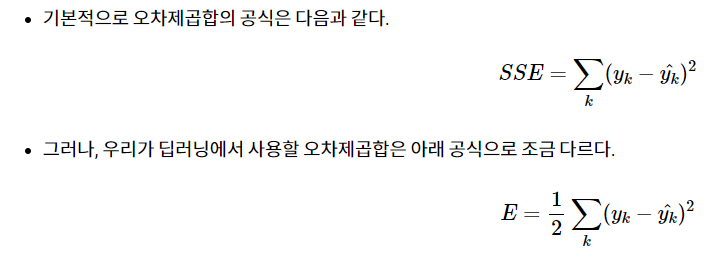

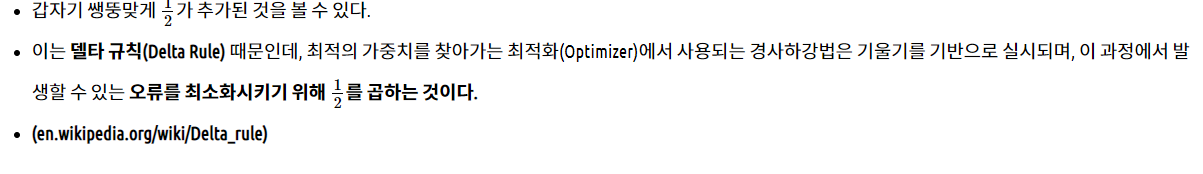

출처 : https://gooopy.tistory.com/60

## 4.2.2 교차 엔트로피 오차(Cross Entropy Error,CEE)

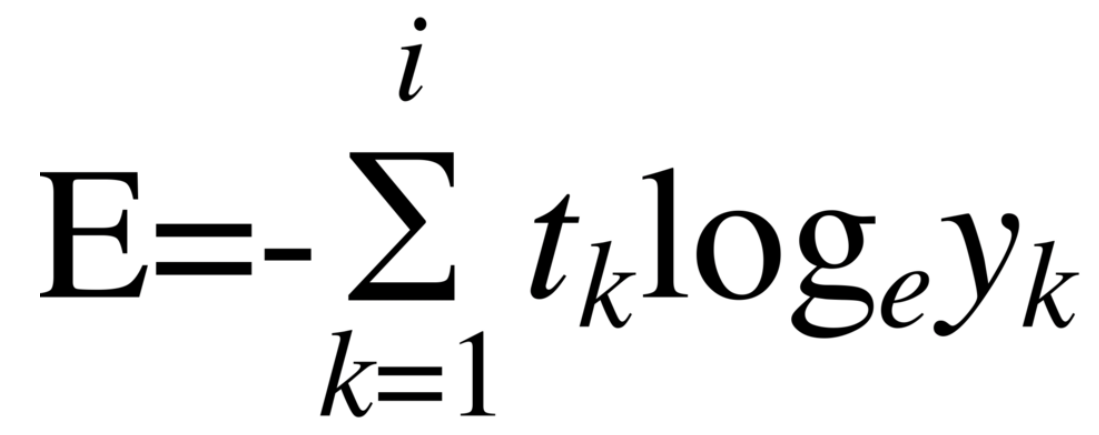

출처 : https://ce-notepad.tistory.com/6

- y(k)는 신경망의 출력, t(k)는 정답 레이블(정답만 1, 나머지는 0인 원-핫 인코딩)
- 따라서, 실질적으로 정답일 때의 추정의 자연로그를 계산하는 식이 된다. 
- 예를 들어, 정답 레이블은 2가 정답이라 하고 이때의 신경망 출력이 0.6이면 교차 엔트로피 오차는 -log0.6 = 0.51이 된다. 
- 즉 CEE는 정답일 떄의 출력이 전체 값을 정하게 된다.

In [2]:
def cross_entropy_error(y,t) :
  delta = 1e-7
  return -np.sum(t*np.log(y+delta)) # 아주 작은 값 delta를 더해주는 이유는 0이 입력되면 마이너스 무한대를 뜻하는 -inf가 되어서 더 이상 계산을 진행할 수가 없기 때문이다.


## 4.2.3 미니배치 학습

- 지금까지 데이터 하나에 대한  손실 함수만 생각해왔으니, 훈련 데이터 모두에 대한 손실함수의 합을 구하는 방법을 생각해보겠다.

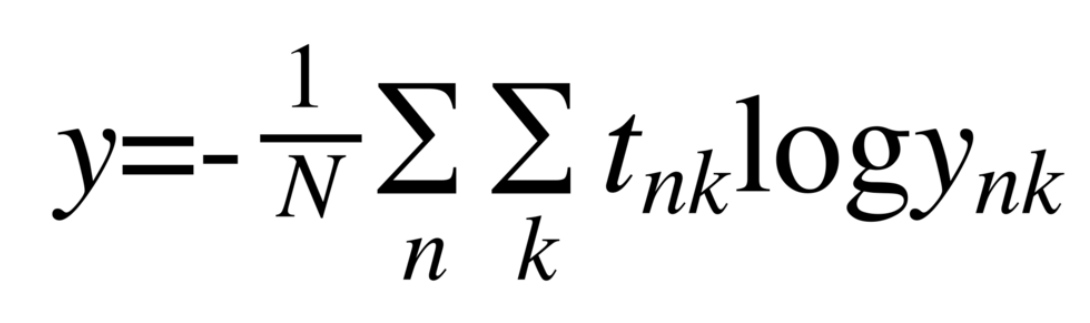

출처: https://ce-notepad.tistory.com/7?category=869990

- 복잡해보이지만 결국에 평균 손실함수를 구하는 것이다.

- 신경망 학습에서도 훈련 데이터로부터 일부만 골라 학습을 수행한다. 이 일부를 미니배치(mini-batch)라 한다. 60000장의 훈련데이터 중에서 무작위로 100장을 뽑아 그 100장만 사용하여 학습을 하는 것이다. 이러한 학습 방법을 미니배치 학습이라고 한다.

In [3]:
from google.colab import files
src = list(files.upload().values())[0]
open('file1.py','wb').write(src)
import file1

Saving mnist.py to mnist.py


In [4]:
(x_train, t_train), (x_test,t_test) = file1.load_mnist(flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)


In [8]:
import numpy as np

train_size = x_train.shape[0]
batch_size = 10
batch_mark = np.random.choice(train_size,batch_size)

x_batch = x_train[batch_mark]
t_batch = t_train[batch_mark]


- np.random.choice()로 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있다.


- 미니배치학습을 사용하는 이유 : 미니배치의 손실 함수도 일부 표본 데이터로 전체를 비슷하게 예측하기 때문에 유용하게 사용할 수 있다. 따라서 전체 훈련 데이터의 대표로서 무작위로 선택한 작은 덩어리를 사용하는 것이다.

## 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [5]:
def cross_entropy_error(y,t) :
  if y.ndim == 1 :
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  batch_size = y.shape[0]

  return -np.sum(t*np.log(y+1e-7)) / batch_size 
  

- 위는 y는 출력, t는 정답 레이블. y가 1차원이라면 데이터 한장당 교차 엔트로피 오차를 구하는 경우에는 reshape 함수로 데이터의 형상을 바꿔준다. 그리고 배치의 크기로 나눠서 정규화하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

- 정답 레이블이 원-핫 인코딩이 아니라 2,7같은 레이블로 주어졌을 때 교차 엔트로피 오차를 다음과 같이 구현 가능.

In [9]:
def cross_entropy_error(y,t) :
  if y.ndim == 1 :
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
  batch_size = y.shape[0]

  return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size 
  

## 4.2.5 왜 손실함수를 설정하는가?

궁극적인 목표는 높은 정확도를 이끌어내는 매개변수를 찾는 것인데, 왜 정확도를 사용하지 않고 손실함수를 사용하는 것일까?

- 이는 신경망 학습에서 '미분'의 역할에 주목하면 해결된다.
- 신경망 학습에서는 최적의 매개변수를 탐색할 때 손실 함수의 값을 가능한 작게하는 매개변수 값을 찾게 된다. 이때 매개변수의 미분을 계산하고 그 미분 값을 단서로 매개변수를 갱신하게 된다.

- 어느 한 가중치 매개변수에 대해 그 미분값이 음수이면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수 값을 줄일 수 있고, 그 미분 값이 양수이면 음의 방향으로 변화시켜 손실 함수 값을 줄일 수 있다. 
미분 값이 0 이 되면 어느 쪽으로 움직여도 손실 함수의 값이 변하지 않기 때문에 그래서 가중치 매개변수 갱신이 멈추게 된다.

- 정확도를 지표로 삼아야하는 이유는 미분 값이 대부분의 장소에서 0이 되어 매개변수를 갱신시킬 수 없기 때문이다.

이에 대해 예를 들자면, 정확도가 32%인 신경망이 정확도 지표를 사용했다면, 가중치 매개변수를 조금 바꾼다고 해도 정확도는 아주 조금 변하여 일정하게 유지될 것이다. 또는 정확도가 개선된다고 하더라도 그것은 연속적인 변화가 아닌 33%, 34%와 같이 불연속적인 값으로 변할 것이다.

하지만 손실함수의 값은 연속적으로 변하게 된다. 

즉, 정확도는 매개변수의 변화에 거의 반응을 보이지 않고, 반응을 보이더라도 그 값이 불연속적으로 변한다. 

## 4.3 수치 미분

## 4.3.1 미분

미분 값은 한순간의 변화량을 표시한 것이다.

In [10]:
np.float32(1e-50)

0.0

이처럼 매우 작은 값을 사용한다면 컴퓨터로 계산하는데 문제가 된다. 따라서 아주 미세한 값 h로 10^-4를 사용한다면 어느 정도 좋은 결과를 얻을 수 있다.

또한 x+h 와 x의 차분은 결국에 정확한 미분값이 아니라, x+h와 x 사이의 기울기 값을 의미한다. 

따라서 이를 위해 x+h와 x-h의 차분을 이용하기도 한다. 그러면 정확히 x의 기울기가 나올 것이다. 이를 '중심 차분' '중앙 차분' 이라고도 한다.

In [11]:
def numerical_diff(f,x):
  h = 1e-4 # 0.001
  return(f(x+h)-f(x-h))/(2*h)
  

## 4.3.2 수치 미분의 예

In [17]:
def function_1 (x) :
  return 0.01*x**2 + 0.1*x


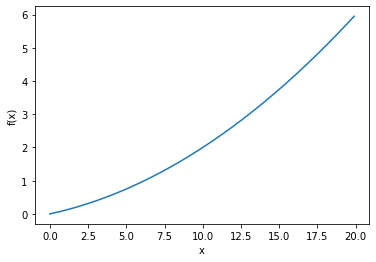

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [19]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


# 4.4 기울기

In [5]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    tmp_val = x[idx]
    
    #f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1-fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad


- 결국 이 기울기라는 것이 의미하느 것이 무엇일까, 기울기의 결과에 마이너스를 붙히면 기울기의 함수는 가장 낮은 장소를 가리키는 것 같다. 
- 즉, 기울기의 마이너스를 붙히면 최솟값을 찾아가게 된다. 
- 그리고 가장 낮은 곳에서 멀어질 수록 값이 커진다. 가까울 수록 그 값이 작아진다. 

## 4.4.1 경사법(경사 하강법)

최적 : 손실 함수가 최솟값이 될 때의 매개변수 값

하지만 매개변수 공간이 광대하여 어디가 최솟값이 되는지 짐작할 수 없다.

이런 상황에서 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법이다.


* 하지만 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기일 뿐.
* 기울기가 가르키는 곳에 정말 함수의 최솟값이 있을 것이라는 보장은 할 수 없다!!


기울어진 방향이 꼭 최솟값을 가르키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다. 


- 경사법
1. 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다.
2. 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 그 기울어진 방향으로 나아가기를 반복.
3. 이렇게 함수의 값을 점차 줄여나가는 것이 '경사법'

- 경사 하강법, 경사 상승법.
1. 경사 하강법은 최솟값을 찾는 것이고.
2. 경사 상승법은 최댓값을 찾는 방법이다.

하지만 손실 함수의 부호를 반전시키면 최솟값을 찾는 문제와 최댓값을 찾는 문제는 본질적으로 같은 문제이므로 하강이냐 상승이냐는 중요하지 않다.

경사법을 수식으로 나타내면 다음과 같다.

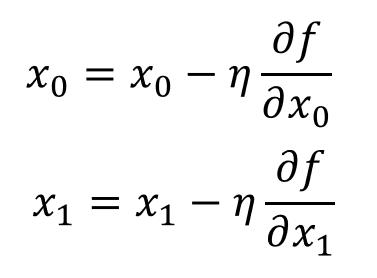


여기서 에타는 갱신하는 양을 나타낸다. 이를 신경망 학습에서는 '학습률(learning rate)'라고 한다. 즉, 한번의 학습으로 매개변수 값을 얼마나 갱신하느냐를 정하는 값이다. 

위 식은 1회 갱신에 해당하는 식이고, 위 식처럼 변수의 값을 갱신하는 단계를 여러번 반복한다.

여기에서는 변수가 2개인 경우를 보였지만, 변수가 늘어나더라도 같은 식으로 갱신하게 된다.

- 또한 학습률은 0.01이나 0.001과 같이 특정 값으로 미리 정해두어야 하는데, 일반적으로 이 값이 너무 크거나 작으면 좋은 학습이 될 수 없다. 

신경망에서는 보통 이 학습률을 변경하면서 오바르게 학습하고 있는지 확인하면서 진행한다.

In [1]:
def gradient_descent(f, init_x,lr=0.01,step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr*grad

  return x

f 는 최적화하려는 함수

init_x 는 초깃값

lr = learnig rate 학습률

step_num 경사법에 따른 반복 횟수

함수의 기울기는 numerical_gradient(f,x)로 구하고 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num만큼 반복한다.

이 함수를 사용한다면 잘하면 극솟값을 구할 수도 있고, 최솟값을 구할 수도 있다.

In [7]:
def function_2(x) :
  return x[0]**2 + x[1]**2

In [8]:
import numpy as np
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x, lr =0.1,step_num=100)


array([-6.11110793e-10,  8.14814391e-10])

여기서는 (-3,4) 를 초깃값으로 설정하고 경사법을 사용하여 최솟값을 찾았는데 (0,0)에 거의 가까운 결과를 찾아낸다. 실제로 진짜 최솟값은 (0,0)이므로 거의 정확한 값을 찾은 것이다.

여기서 학습률이 너무 크거나 작으면 좋지 않은 예를 들자면??

In [11]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x, lr =10,step_num=100)


array([-2.58983747e+13, -1.29524862e+12])

이와 같이 학습률이 너무 크게되면 큰 값으로 발산해버린다.

In [10]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x, lr =1e-10,step_num=100)


array([-2.99999994,  3.99999992])

반대로 너무 작으면 갱신되지 않은 채 끝나버린다.

- 학습률과 같이 사람이 직접 설정해야 하는 변수를 '하이퍼파라미터'라 한다. 이 '하이퍼파라미터'는 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.